In [25]:
#linear-regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [16]:
df = pd.read_csv("data.csv")
print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (4600, 18)
                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renova

In [17]:
features = [
    'bedrooms', 'bathrooms', 'sqft_living', 'floors', 
    'waterfront', 'view', 'condition', 
    'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated'
]
target = 'price'

data = df[features + [target]]

# Step 4: Handle missing values
data = data.fillna(data.median())

# Step 5: Split data into features (X) and target (y)
X = data[features]
y = data[target]

# Step 6: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [20]:
y_pred = model.predict(X_test_scaled)

In [21]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nMean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.3f}")


Mean Squared Error: 988408597251.44
R² Score: 0.031


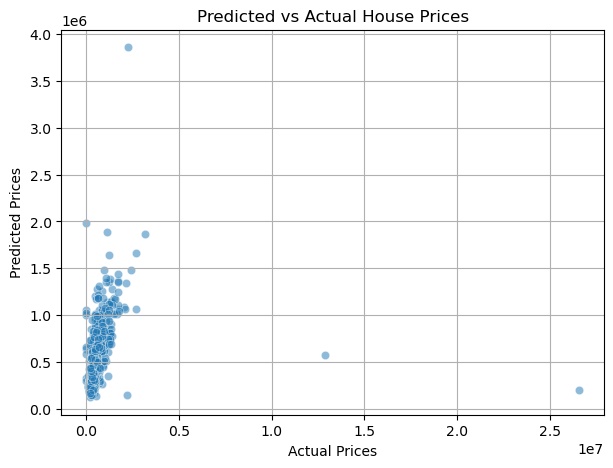

In [23]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual House Prices")
plt.grid(True)
plt.show()

C:\Users\datta\AppData\Local\Temp\ipykernel_31384\1941727905.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='viridis')


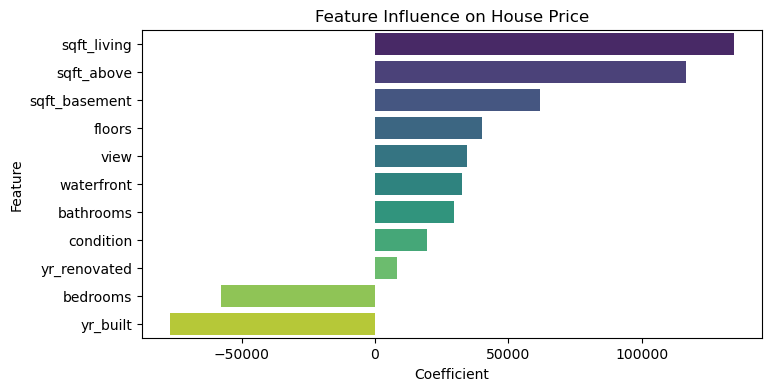


Feature Coefficients:
           Feature    Coefficient
2     sqft_living  134536.321144
7      sqft_above  116647.317739
8   sqft_basement   61935.927098
3          floors   39968.468923
5            view   34536.116797
4      waterfront   32692.163029
1       bathrooms   29606.238292
6       condition   19441.653689
10   yr_renovated    8079.064121
0        bedrooms  -57672.419299
9        yr_built  -76828.588241


In [26]:
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='viridis')
plt.title("Feature Influence on House Price")
plt.show()

print("\nFeature Coefficients:\n", coef_df)